# Image compression with K-means

In this project, we will apply K-means to image compression. 

* In a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
* Our image contains thousands of colors, we will reduce the number of
colors to 16 colors.
* By making this reduction, it is possible to represent (compress) the photo in an efficient way. 
* Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

In [103]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import  KMeans

In [104]:
# Load the image
original_img = plt.imread('img.jpg')

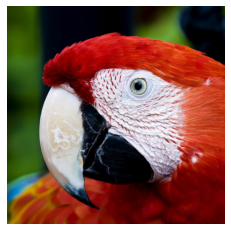

In [105]:
plt.imshow(original_img)
plt.axis('off');

In [106]:
# The shape of the image
original_img.shape

(1000, 1000, 3)

As you can see, this creates a three-dimensional matrix `original_img` where 
* the first two indices identify a pixel position, and
* the third index represents red, green, or blue. 

For example, `original_img[60, 22, 0]` gives the red intensity of the pixel at row 60 and column 22.

To apply the KMeans, you need to first transform the matrix `original_img` into a two-dimensional matrix.

* The code below reshapes the matrix `original_img` to create an $m \times 3$ matrix of pixel colors (where
$m= width\times height$)

In [107]:
# Deviding by 255 so all the values are in the range 0 - 1
original_img = original_img / 255

# Rehsaping the image into m * 3 so we use it on KMeans (where m = number of pixels)
# Each row will contain the Red, Green and Blue pixel intensity values
X_img = original_img.reshape(original_img.shape[0] * original_img.shape[1], 3)

In [108]:
# n_clusters = number of colors in compressed image
model = KMeans(n_clusters = 16).fit(X_img)

In [109]:
model.cluster_centers_, model.labels_, model.labels_.shape

(array([[0.01566912, 0.01958532, 0.04212667],
        [0.82014075, 0.80185031, 0.81996313],
        [0.69965466, 0.11463824, 0.04132568],
        [0.36526469, 0.54105615, 0.17706568],
        [0.34425107, 0.00616289, 0.00755371],
        [0.59241419, 0.51776916, 0.53339198],
        [0.87563741, 0.4108606 , 0.32102403],
        [0.52282864, 0.04964596, 0.02126267],
        [0.75163419, 0.67934468, 0.6939201 ],
        [0.19810796, 0.34448582, 0.0550488 ],
        [0.64042152, 0.3619033 , 0.02917248],
        [0.90398458, 0.89879177, 0.93492536],
        [0.20699058, 0.49888647, 0.60515289],
        [0.80265222, 0.24158571, 0.13686131],
        [0.33549029, 0.30223731, 0.32365899],
        [0.10779906, 0.18207211, 0.07731857]]),
 array([15, 15, 15, ...,  4,  4,  4], dtype=int32),
 (1000000,))

In [110]:
idx = model.labels_

# Representing image in terms of indices
X_recovered = model.cluster_centers_[idx, :]

In [111]:
X_recovered, X_recovered.shape

(array([[0.10779906, 0.18207211, 0.07731857],
        [0.10779906, 0.18207211, 0.07731857],
        [0.10779906, 0.18207211, 0.07731857],
        ...,
        [0.34425107, 0.00616289, 0.00755371],
        [0.34425107, 0.00616289, 0.00755371],
        [0.34425107, 0.00616289, 0.00755371]]), (1000000, 3))

In [112]:
# Reshaping recovered image into proper dimensions
X_recovered = X_recovered.reshape(original_img.shape)
X_recovered

array([[[0.10779906, 0.18207211, 0.07731857],
        [0.10779906, 0.18207211, 0.07731857],
        [0.10779906, 0.18207211, 0.07731857],
        ...,
        [0.10779906, 0.18207211, 0.07731857],
        [0.10779906, 0.18207211, 0.07731857],
        [0.10779906, 0.18207211, 0.07731857]],

       [[0.10779906, 0.18207211, 0.07731857],
        [0.10779906, 0.18207211, 0.07731857],
        [0.10779906, 0.18207211, 0.07731857],
        ...,
        [0.10779906, 0.18207211, 0.07731857],
        [0.10779906, 0.18207211, 0.07731857],
        [0.10779906, 0.18207211, 0.07731857]],

       [[0.10779906, 0.18207211, 0.07731857],
        [0.10779906, 0.18207211, 0.07731857],
        [0.10779906, 0.18207211, 0.07731857],
        ...,
        [0.10779906, 0.18207211, 0.07731857],
        [0.10779906, 0.18207211, 0.07731857],
        [0.10779906, 0.18207211, 0.07731857]],

       ...,

       [[0.64042152, 0.3619033 , 0.02917248],
        [0.64042152, 0.3619033 , 0.02917248],
        [0.64042152, 0

Finally, you can view the effects of the compression by reconstructing
the image based only on the centroid assignments. 
* Specifically, you can replace each pixel location with the mean of the centroid assigned to
it. 
* Figure 3 shows the reconstruction we obtained. Even though the resulting image retains most of the characteristics of the original, we also see some compression artifacts.

In [113]:
n_colors = model.cluster_centers_.shape[0]

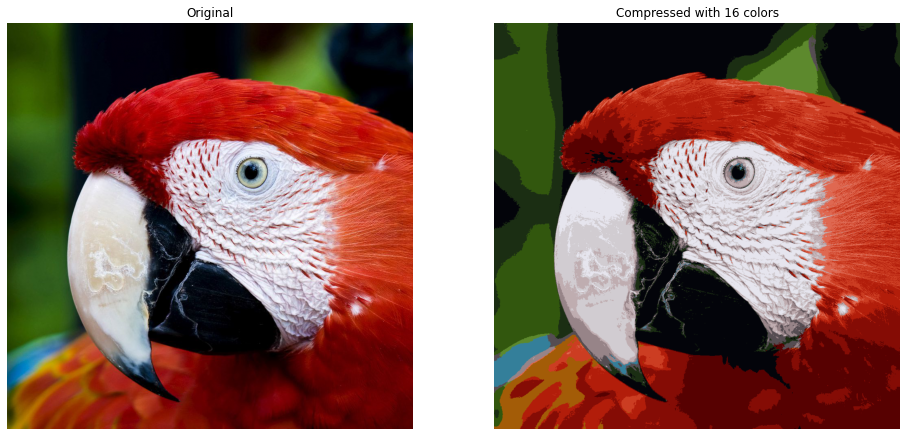

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(16,16))

ax[0].imshow(original_img)
ax[0].set_axis_off()
ax[0].set_title('Original')

ax[1].imshow(X_recovered)
ax[1].set_axis_off()
ax[1].set_title(f'Compressed with {n_colors} colors');